In [44]:
import pandas as pd
import numpy as np

# Scaling modules
from mlxtend.preprocessing import minmax_scaling, standardize

# Plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures the same random data is used each time you execute the code
np.random.seed(0)

In [45]:
# Read in store_income_task.csv

store_income_df = pd.read_csv("store_income_task.csv", index_col=0)

# Display the first 5 observations
store_income_df.head(5)

,id,store_name,store_email,department,income,date_measured,country,days_ago
0,1,"Cullen/Frost Bankers, Inc.",NaN,Clothing,$54438554.24,4-2-2006,United States,6619
1,2,Nordson Corporation,NaN,Tools,$41744177.01,4-1-2006,United Kingdom,6620
2,3,"Stag Industrial, Inc.",NaN,Beauty,$36152340.34,12-9-2003,United States,7464
3,4,FIRST REPUBLIC BANK,ecanadine3@fc2.com,Automotive,$8928350.04,8-5-2006,United Kingdom,6494
4,5,Mercantile Bank Corporation,NaN,Baby,$33552742.32,21-1-1973,United Kingdom,18743


In [46]:
# Get the number of missing data points per column
missing_values_count = store_income_df.isnull().sum()
print("Number of missing data points per column in store income dataset: ")
print(missing_values_count)
print()

# Identify the number of missing values in the first ten columns
print("The number of missing data points in the first ten columns: ")
missing_values_count[0:10]

Number of missing data points per column in store income dataset: 
id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           86
days_ago           0
dtype: int64

The number of missing data points in the first ten columns: 


id                 0
store_name         0
store_email      587
department        27
income             0
date_measured      0
country           86
days_ago           0
dtype: int64

## Histogram of the categorical features with missing data points

First, in order to take a brief look at the underlying distribution of the departments and the countries, the histograms of these two categorical features needs to be displayed.
The reason why the 'store_email' is excluded from this analysis, is because the emails are personalised information and exclusive to each store alone. 
Thus, the histogram belonging to the number of emails won't report any significant information.

The distributions could be of great importance because the plots will display if the data collection process was biased in any way, for example if the number of stores located in UK is signifcantly higher than the ones located in the other countries.

In order to include the missing data points in the analysis, all the nan data points need to be switched with another value like 'Other'.
In other words, they will be all labled in a separate group and will be still counted in the histogram.

In [59]:
missing_data_filled_df = store_income_df.fillna("Other")

Text(0.5, 1.0, 'The histogram of the count of departments')

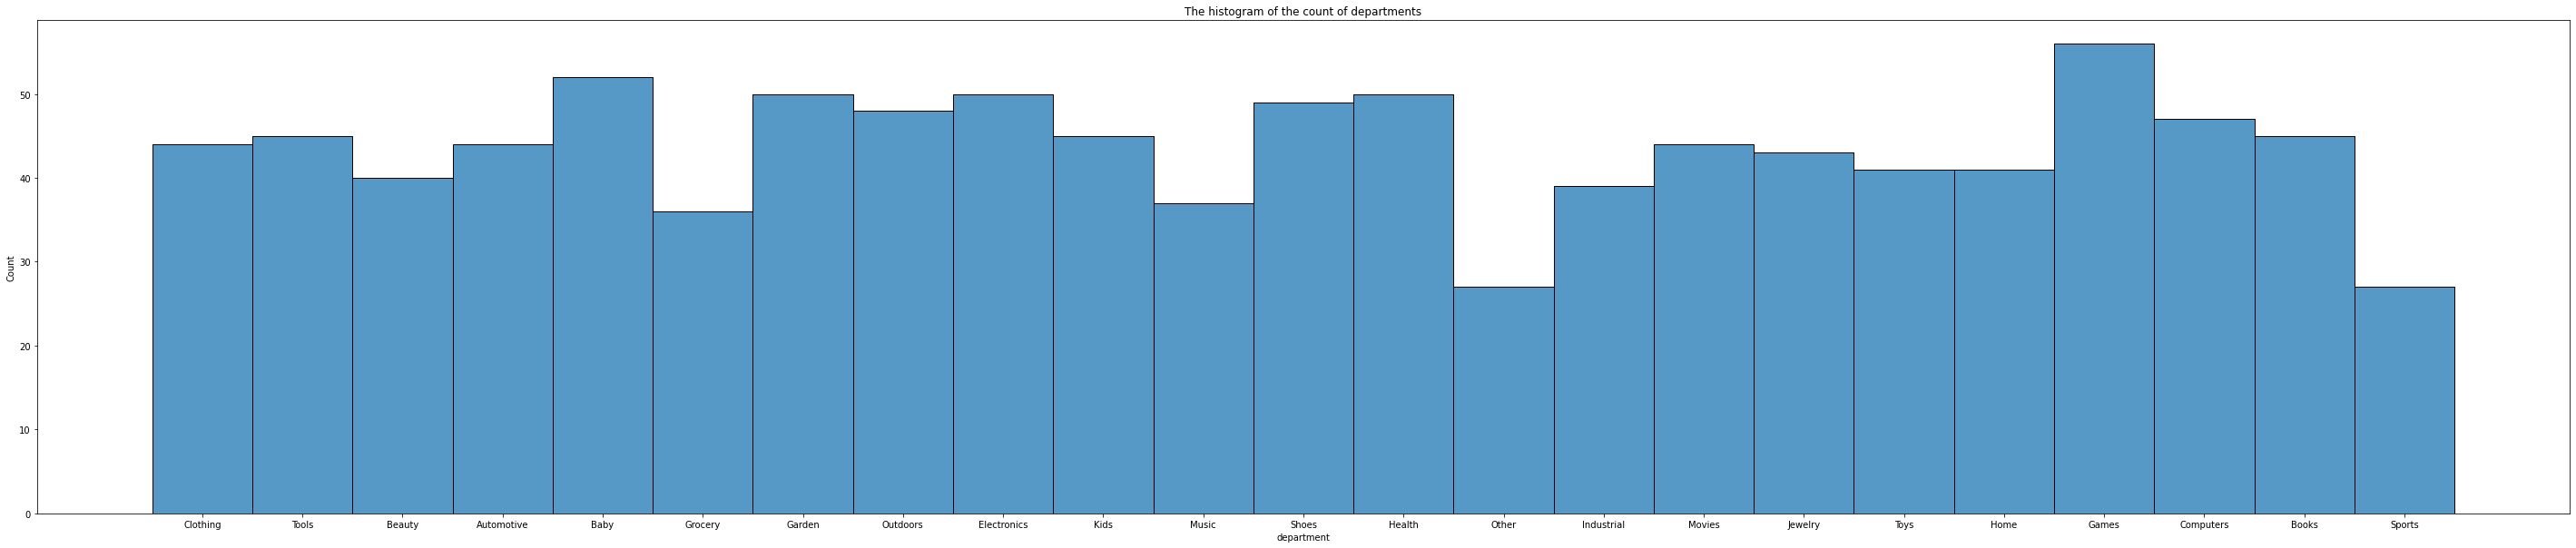

In [66]:
plt.figure(figsize=(50, 10))
sns.histplot(data=missing_data_filled_df, x="department")
plt.title("The histogram of the count of departments")

Text(0.5, 1.0, 'The histogram of the count of countries')

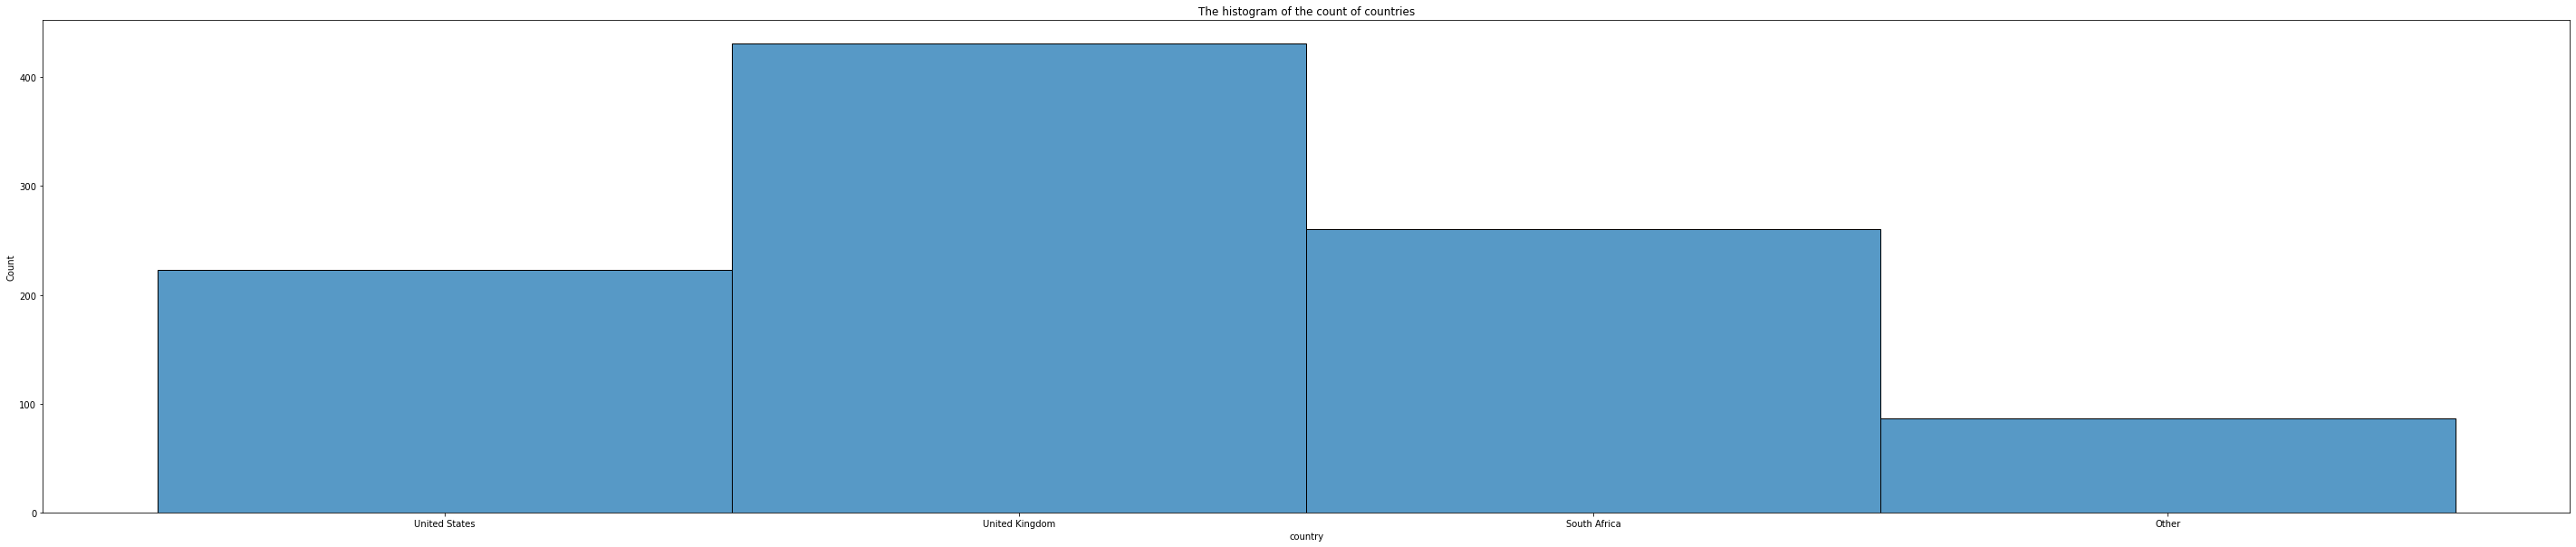

In [67]:
plt.figure(figsize=(50, 10))
sns.histplot(data=missing_data_filled_df, x="country")
plt.title("The histogram of the count of countries")

Based on the two histograms plotted from the 'country' and 'department' columns, it is evident that the distribution of the number of stores from different departments is more evenly distributed compared to the ones from different countries.
In another words, most of the available stores in the dataset are from UK. 

This can be considered as an underlying biase in the data collection.

This discovery could be of potential help while trying to distinguish the type of missing data.

For example, if the ratio of the missing number of emails is similar amongst different departments and different countries, then the missing data is potentially MCAR, since the missing data does not depend on the values of any potential variable. 

On the other hand, if the ratios are varied, this could be a sign of MAR or MNAR, depending on how the data was collected and any other external influence in the process.

On the next steps, the ratio of missing data will be plotted in each department or country.

The reason behind on choosing only on these two variables was that both of them consist of finite number of categories and that makes the basic analysis easier to read and explain.

## store_email

First, it is essential to measure the availability of the 'store_email' column in the dataset:

In [53]:
print(
    f"Nan rate of the 'store_email' column: {missing_values_count['store_email']/store_income_df.shape[0]}"
)

Nan rate of the 'store_email' column: 0.587


This shows that more than half of the companies in the dataset don't have an email, without considering their departments and countries.

In [76]:
# Finding the number of stores without emails in each department
missing_email_per_dep = (
    store_income_df.loc[
        store_income_df.store_email.isna() & store_income_df.department.notna()
    ]
    .groupby("department")
    .count()
    .id
)
# Finding the total number of stores in each department
total_stores_count_per_dep = store_income_df.groupby("department").count().id
# Finding the ratio of missing emails in each department
missing_email_ratio_per_dep = missing_email_per_dep / total_stores_count_per_dep

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The ratio of stores without emails vs total number of stores from each department')

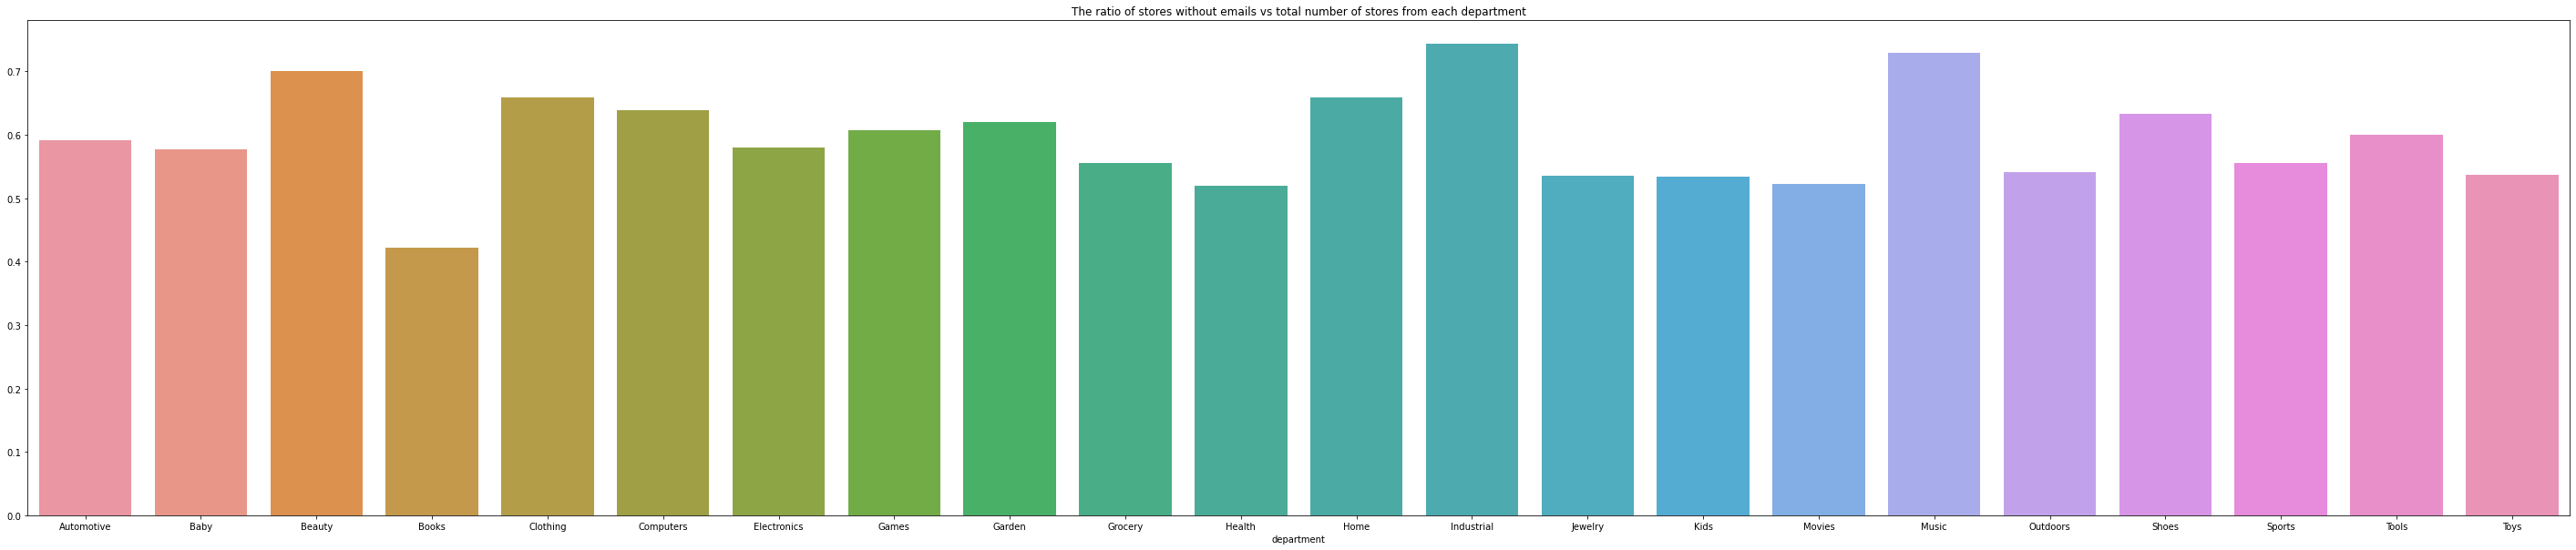

In [90]:
plt.figure(figsize=(50, 10))
# Plotting the missing ratio of emails in each department
sns.barplot(missing_email_ratio_per_dep.index, missing_email_ratio_per_dep.values)
plt.title(
    "The ratio of stores without emails vs total number of stores from each department"
)

The plot explains that in different departments, the porbability of a store existing without email address, may differ.

It suggests that the stores from Beauty, Industrial and Music most probably don't mention their email or don't have it available.

This could be caused by different preferred contact means, or the unavailability of their email addresses or simply them resisting to share their information.

In conclusion, the missing email might depend on which department they belong to.
This means the missing data are potentially not of type MCAR based on the values from department column.

In [78]:
# The number of stores with missing email in each country
missing_email_per_country = (
    store_income_df.loc[
        store_income_df.store_email.isna() & store_income_df.country.notna()
    ]
    .groupby("country")
    .count()
    .id
)
# The total number of stores in each country
total_stores_count_per_country = store_income_df.groupby("country").count().id
# The ratio of stores without email in each country
missing_email_ratio_per_country = (
    missing_email_per_country / total_stores_count_per_country
)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The ratio of stores without email per each country')

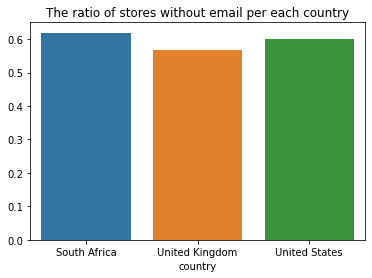

In [91]:
sns.barplot(
    missing_email_ratio_per_country.index, missing_email_ratio_per_country.values
)
plt.title("The ratio of stores without email per each country")

By looking at this plot, it can be concluded that the missing emails amongst the stores is universal. 

Since the ratio of the number of stores without email in each country is close to one another, then it does not depend where the store is located, the probability of the data missing is nearly the same.

In other words, the missing emails based on their location can be MCAR. 


## department

In [87]:
# The number of stores without department in different countries
missing_dep_per_country = (
    store_income_df.loc[
        store_income_df.department.isna() & store_income_df.country.notna()
    ]
    .groupby("country")
    .count()
    .id
)

# The ratio of stores without departments in each country
missing_dep_ratio_per_country = missing_dep_per_country / total_stores_count_per_country

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The ratio of stores without departments in each country')

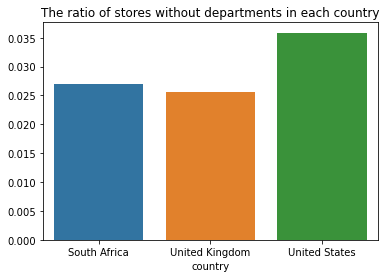

In [93]:
sns.barplot(missing_dep_ratio_per_country.index, missing_dep_ratio_per_country.values)

plt.title("The ratio of stores without departments in each country")

In the case of departments' missing, the missing ratios are quite low because of the small number of missing data points.

While the ratio's of UK and SA are closer, it seems that more stores from US have their departments missing.

Thus judging by the trend found in the plot, the missing department can depend on the country.

The type of missing can be either MAR or MNAR.

Although it is easier to explain the underlying reason from MAR perspective, where the departments are excluded because they did not belong to category of interest, or the departments were of special categories.

## country

In [88]:
# The number of stores without countries in different departments
missing_country_per_dep = (
    store_income_df.loc[
        store_income_df.country.isna() & store_income_df.department.notna()
    ]
    .groupby("department")
    .count()
    .id
)

# The ratio of the number of stores per departments
missing_country_ratio_per_dep = missing_country_per_dep / total_stores_count_per_dep

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The ratio of the number of stores per departments')

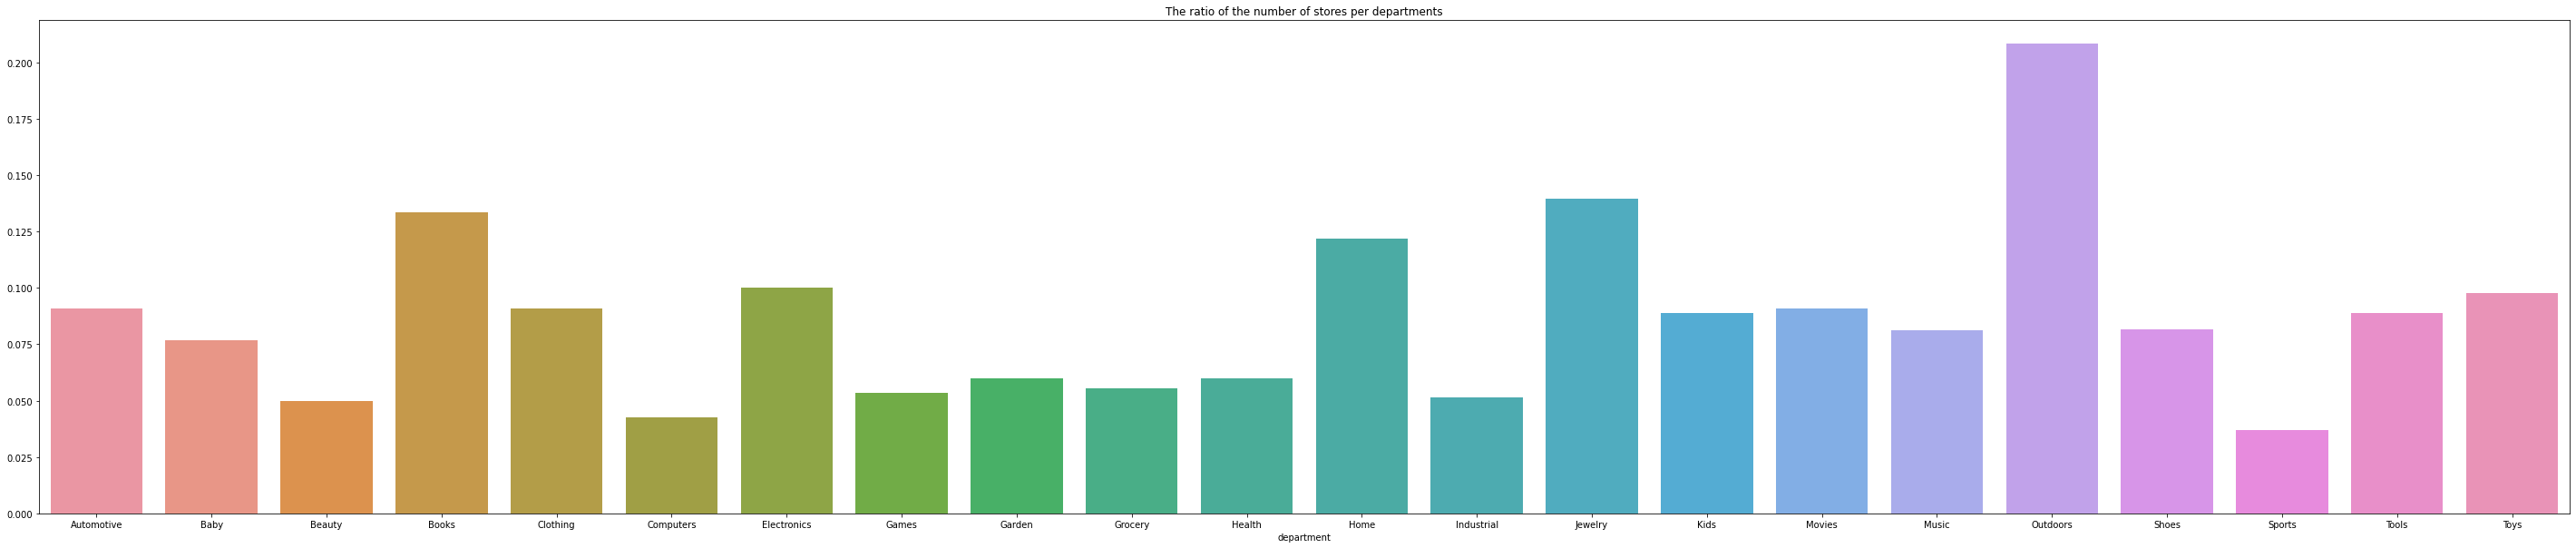

In [94]:
plt.figure(figsize=(50, 10))

sns.barplot(missing_country_ratio_per_dep.index, missing_country_ratio_per_dep.values)

plt.title("The ratio of the number of stores per departments")

Given the results shown by the plot above, there is a possible dependency between the store's missing country and the department which they belong.
Most of the stores with missing countries are of Outdoors department.
Hence, the possibility of MAR and MNAR are stronger.

In order to distinguish which of these two types is closer to this case, the way of collecting data can be of help.

Since there is already a bias in the number of stores in each country, with the large gap between the number of stores in UK versus other countries, the missing data in this case could be of type MNAR.